In [43]:
# Adding the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
df = pd.read_csv('/Users/berekettadesse/3162/pokemon.csv')
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


# Pre-processing 

In [3]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


In [4]:
#Check for null vales in the data
df.isna().sum()

number          0
name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64

In [5]:
# Replacing the null value
df['type2'] = df['type2'].fillna('None')
#Check again for the null value after replacing
df.isna().sum()

number        0
name          0
type1         0
type2         0
total         0
hp            0
attack        0
defense       0
sp_attack     0
sp_defense    0
speed         0
generation    0
legendary     0
dtype: int64

# Data understanding 

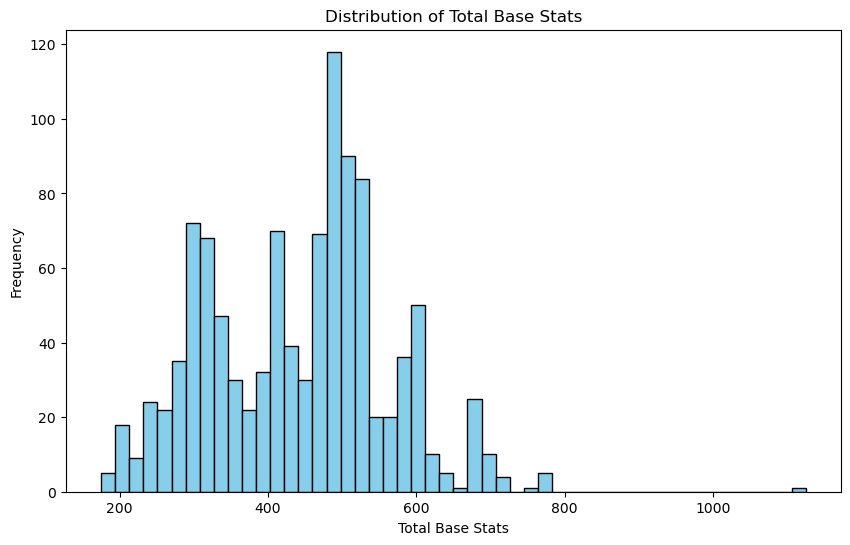

In [6]:
# Plotting the distribution of total base stats
plt.figure(figsize=(10, 6))
df['total'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Base Stats')
plt.xlabel('Total Base Stats')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

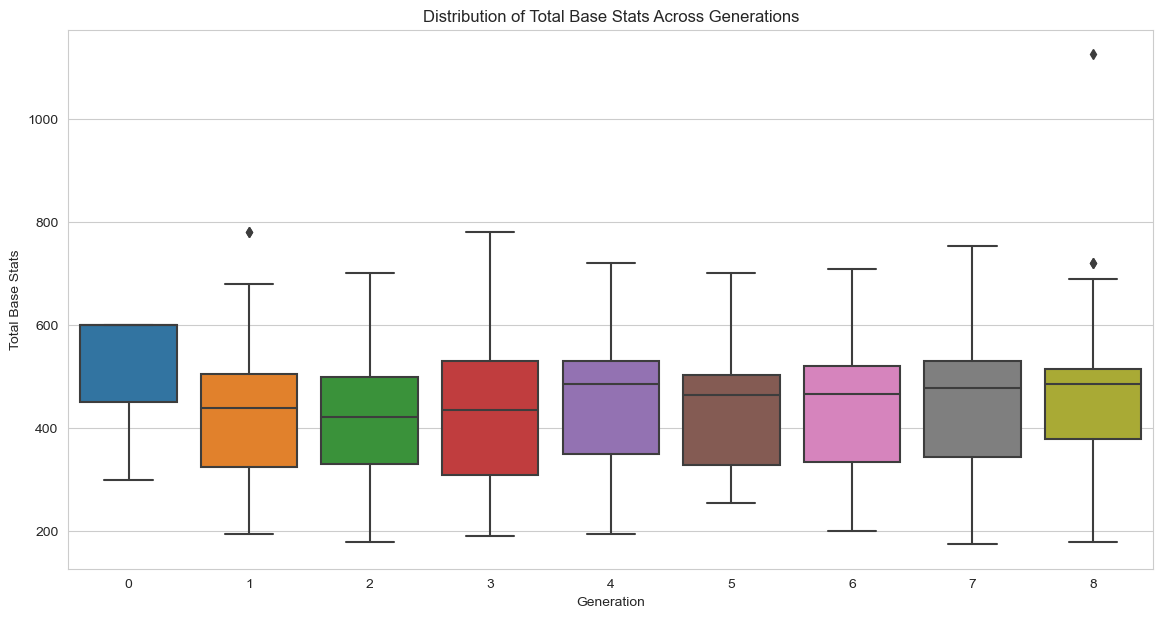

In [7]:
# Plotting the distribution of total base stats across generations
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='generation', y='total', data=df)
plt.title('Distribution of Total Base Stats Across Generations')
plt.xlabel('Generation')
plt.ylabel('Total Base Stats')
plt.show()

# Clustering 

In [48]:
# Extract the 'total' column
X = df[['total']]

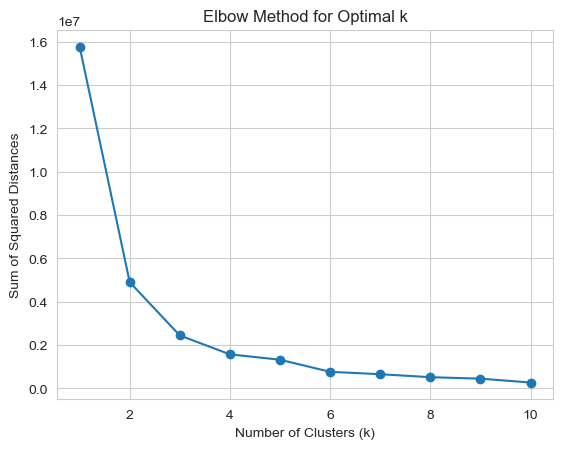

In [50]:
# Determine the optimal number of clusters (k) using the elbow method
inertia = []
possible_k_values = range(1, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(possible_k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [51]:
from sklearn.cluster import KMeans

# Define the number of clusters (tiers). from the graph above, I decided we go with 3
k = 3

# Fit the k-means model
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)
df['tier'] = kmeans.fit_predict(X)


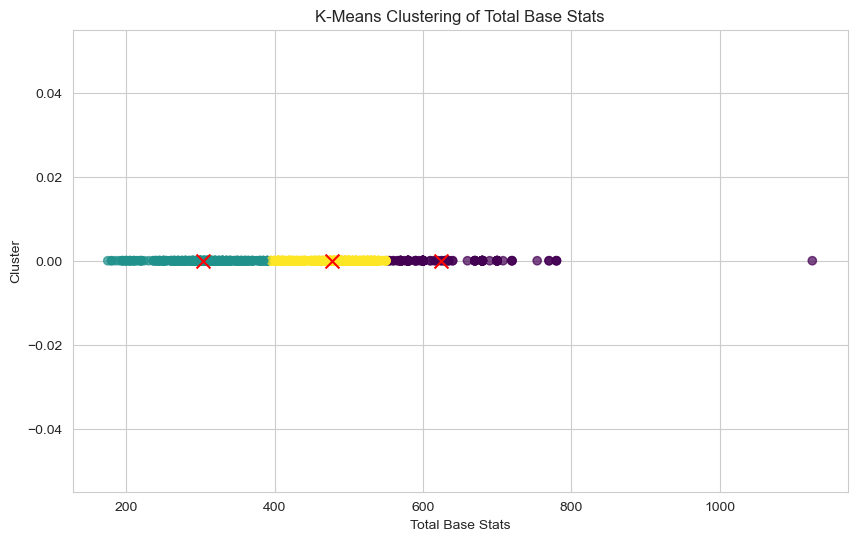

In [52]:
plt.figure(figsize=(10, 6))

# Scatter plot of the data points with color-coded clusters
plt.scatter(X, np.zeros_like(X), c=df['tier'], cmap='viridis', marker='o', alpha=0.7)

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_, [0] * k, c='red', marker='x', s=100)

plt.title('K-Means Clustering of Total Base Stats')
plt.xlabel('Total Base Stats')
plt.ylabel('Cluster')
plt.show()


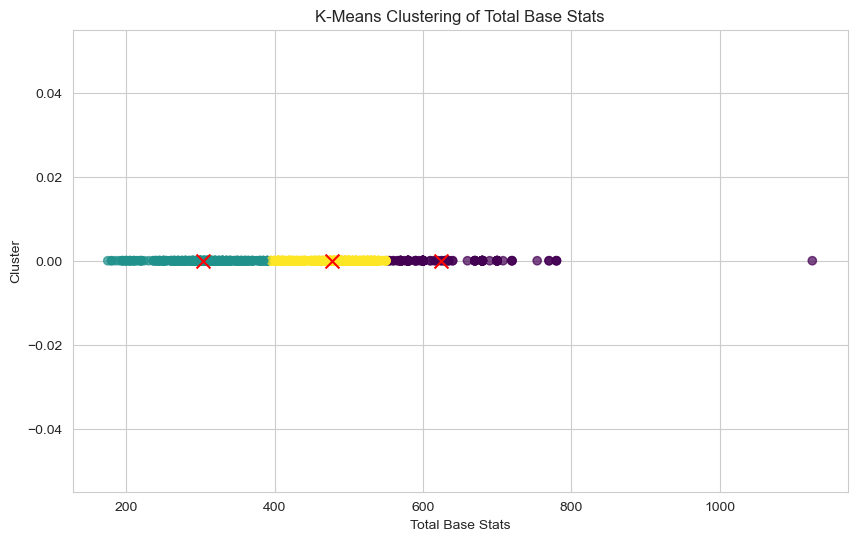

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Assuming df and X are defined as in your code
k = 3

# Fit the k-means model
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)
df['tier'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))

# Scatter plot of the data points with color-coded clusters
plt.scatter(X, np.zeros_like(X), c=df['tier'], cmap='viridis', marker='o', alpha=0.7)

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_, [0] * k, c='red', marker='x', s=100)

plt.title('K-Means Clustering of Total Base Stats')
plt.xlabel('Total Base Stats')
plt.ylabel('Cluster')
plt.show()


Now that we have K-means clustering done, we can move on to making the tier list

We wanted to use Percentile threshold to make the list.

In [62]:
# Calculate percentiles
percentiles = df['total'].describe(percentiles=[0.25, 0.5, 0.75])

# Define tier boundaries
tier1_threshold = percentiles['75%']
tier2_threshold = percentiles['50%']

# Assign tiers based on total base stats
df.loc[df['total'] > tier1_threshold, 'tier'] = 'Tier 1'
df.loc[(df['total'] <= tier1_threshold) & (df['total'] > tier2_threshold), 'tier'] = 'Tier 2'
df.loc[df['total'] <= tier2_threshold, 'tier'] = 'Tier 3'


We have our tier list created. Let's visulaize it using bar graph

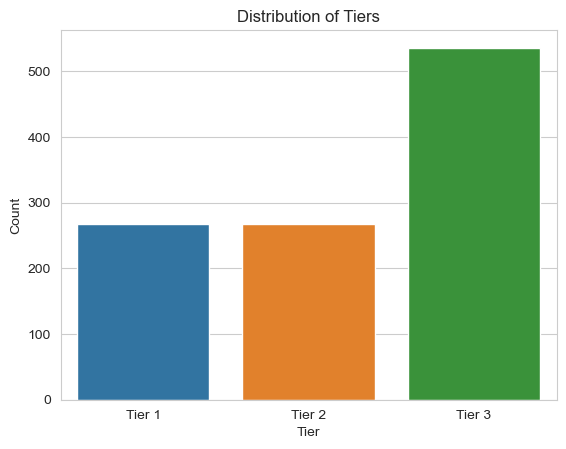

In [63]:
# Countplot to visualize the distribution of tiers
sns.countplot(x='tier', data=df, order=['Tier 1', 'Tier 2', 'Tier 3'])
plt.title('Distribution of Tiers')
plt.xlabel('Tier')
plt.ylabel('Count')
plt.show()


In [64]:
# Count the number of Pokémon in each tier
tier_counts = df['tier'].value_counts()

# Display the counts
print(tier_counts)


tier
Tier 3    536
Tier 1    268
Tier 2    268
Name: count, dtype: int64


Let's evaluate our model using Silhouette Score

In [65]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, kmeans.labels_)

# Print the Silhouette Score
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.6164706441186106


We found our Silhouette Score to be 0.62 which isn't that bad but we wanted to see if we can improve it by using different clustering method (hierarchical)

# hierarchical clustering

In [68]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

# Perform hierarchical clustering on the total base stats
features_hierarchical = df[['total']]

# Define the distance threshold to control the number of clusters
distance_threshold = 2

# Fit hierarchical clustering model
hierarchical_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold, linkage='ward')
pokemon_labels_hierarchical = hierarchical_clustering.fit_predict(features_hierarchical)


In [69]:
# Calculate percentiles
percentiles = df['total'].describe(percentiles=[0.25, 0.5, 0.75])

# Define tier boundaries
tier1_threshold = percentiles['75%']
tier2_threshold = percentiles['50%']

# Assign tiers based on total base stats
df.loc[df['total'] > tier1_threshold, 'tier_hierarchical'] = 'Tier 1'
df.loc[(df['total'] <= tier1_threshold) & (df['total'] > tier2_threshold), 'tier_hierarchical'] = 'Tier 2'
df.loc[df['total'] <= tier2_threshold, 'tier_hierarchical'] = 'Tier 3'

In [71]:
#silhouette_avg_hierarchical = silhouette_score(features_hierarchical, pokemon_labels_hierarchical)
#print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical}")


In [76]:
silhouette_avg_hierarchical = silhouette_score(features_hierarchical, pokemon_labels_hierarchical)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical}")

Silhouette Score for Hierarchical Clustering: 0.898631805560131


Using hierarchical clustering we found a better Silhouette Score thus, Hierarchical Clustering is a better fit for our data.

In [77]:
# Assign tiers based on hierarchical clustering labels
df.loc[pokemon_labels_hierarchical == 0, 'tier_hierarchical'] = 'Tier 1'
df.loc[pokemon_labels_hierarchical == 1, 'tier_hierarchical'] = 'Tier 2'
df.loc[pokemon_labels_hierarchical == 2, 'tier_hierarchical'] = 'Tier 3'
# Add more conditions if there are more clusters

# Print the count of Pokémon in each tier
tier_counts_hierarchical = df['tier_hierarchical'].value_counts()
print(tier_counts_hierarchical)


tier_hierarchical
Tier 3    527
Tier 1    277
Tier 2    268
Name: count, dtype: int64


In [89]:
# Create a cross-tabulation of tiers and generations
tier_generation_counts = pd.crosstab(index=df['generation'], columns=df['tier_hierarchical'])

# Calculate the percentage distribution
tier_generation_percentages = tier_generation_counts.div(tier_generation_counts.sum(axis=1), axis=0) * 100

# Display the table
print("Percentage Distribution of Pokemon Tiers Across Generations (Hierarchical Clustering):\n")
print(tier_generation_percentages)

Percentage Distribution of Pokemon Tiers Across Generations (Hierarchical Clustering):

tier_hierarchical     Tier 1     Tier 2     Tier 3
generation                                        
0                  66.666667   0.000000  33.333333
1                  21.910112  21.348315  56.741573
2                  19.811321  17.924528  62.264151
3                  26.250000  15.625000  58.125000
4                  36.363636  20.661157  42.975207
5                  22.289157  32.530120  45.180723
6                  25.882353  27.058824  47.058824
7                  28.070175  28.070175  43.859649
8                  27.338129  37.410072  35.251799


In [90]:
import pandas as pd

# Create a cross-tabulation of tiers and generations
tier_generation_counts = pd.crosstab(index=df['generation'], columns=df['tier_hierarchical'])

# Display the table
print(tier_generation_counts)

tier_hierarchical  Tier 1  Tier 2  Tier 3
generation                               
0                       2       0       1
1                      39      38     101
2                      21      19      66
3                      42      25      93
4                      44      25      52
5                      37      54      75
6                      22      23      40
7                      32      32      50
8                      38      52      49


From the two tables above, we can see that 4th generation has more Pokemon in Tier 1

# Exploring our model/tier results (Extra)

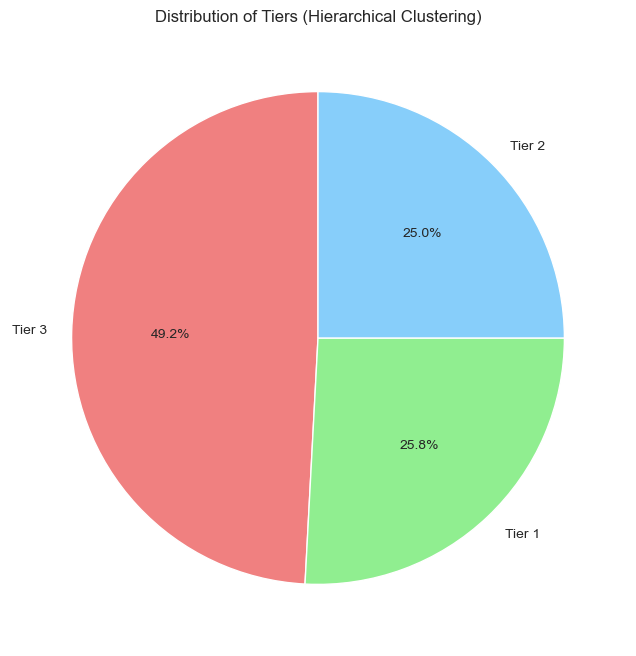

In [81]:
# Pie chart to visualize the distribution of tiers
plt.figure(figsize=(8, 8))
tier_counts_hierarchical.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Distribution of Tiers (Hierarchical Clustering)')
plt.ylabel('')
plt.show()


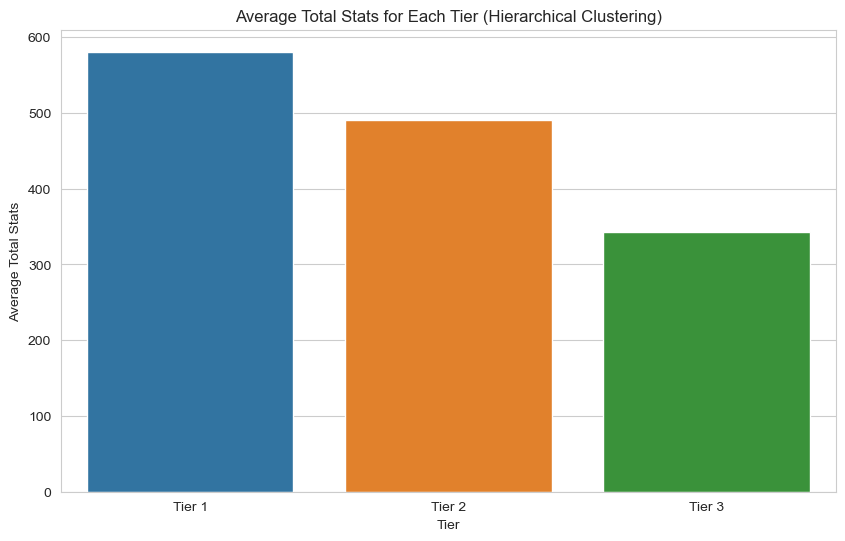

In [82]:
# Group the DataFrame by tier and calculate the average total stats
tier_stats = df.groupby('tier_hierarchical')['total'].mean()

# Plot the average total stats for each tier
plt.figure(figsize=(10, 6))
sns.barplot(x=tier_stats.index, y=tier_stats.values, order=['Tier 1', 'Tier 2', 'Tier 3'])
plt.title('Average Total Stats for Each Tier (Hierarchical Clustering)')
plt.xlabel('Tier')
plt.ylabel('Average Total Stats')
plt.show()


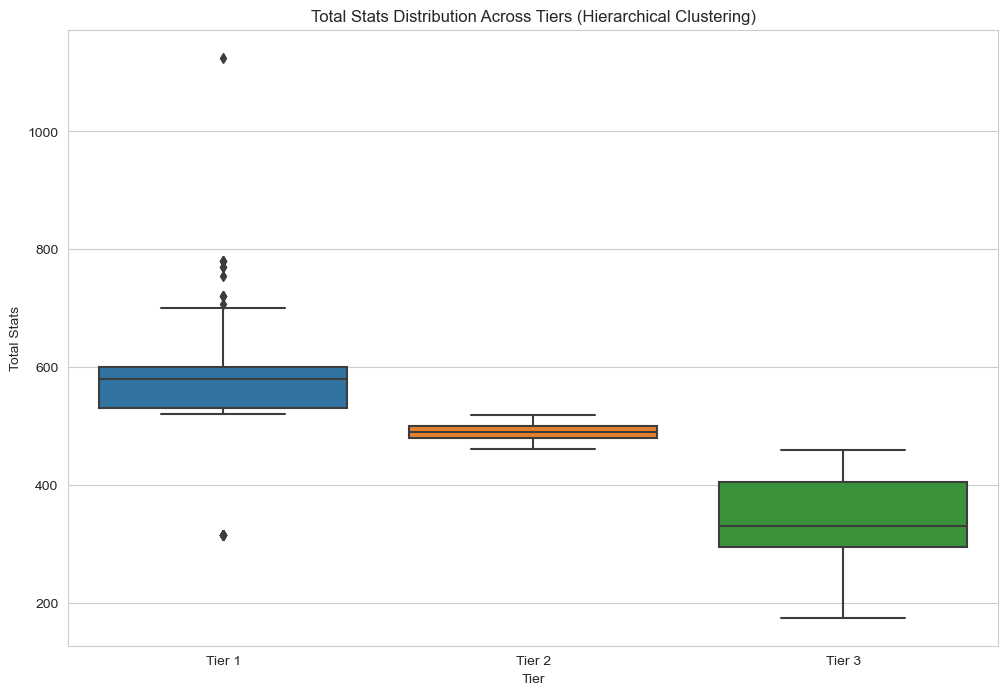

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize the distribution of total stats across tiers
plt.figure(figsize=(12, 8))
sns.boxplot(x='tier_hierarchical', y='total', data=df, order=['Tier 1', 'Tier 2', 'Tier 3'])
plt.title('Total Stats Distribution Across Tiers (Hierarchical Clustering)')
plt.xlabel('Tier')
plt.ylabel('Total Stats')
plt.show()


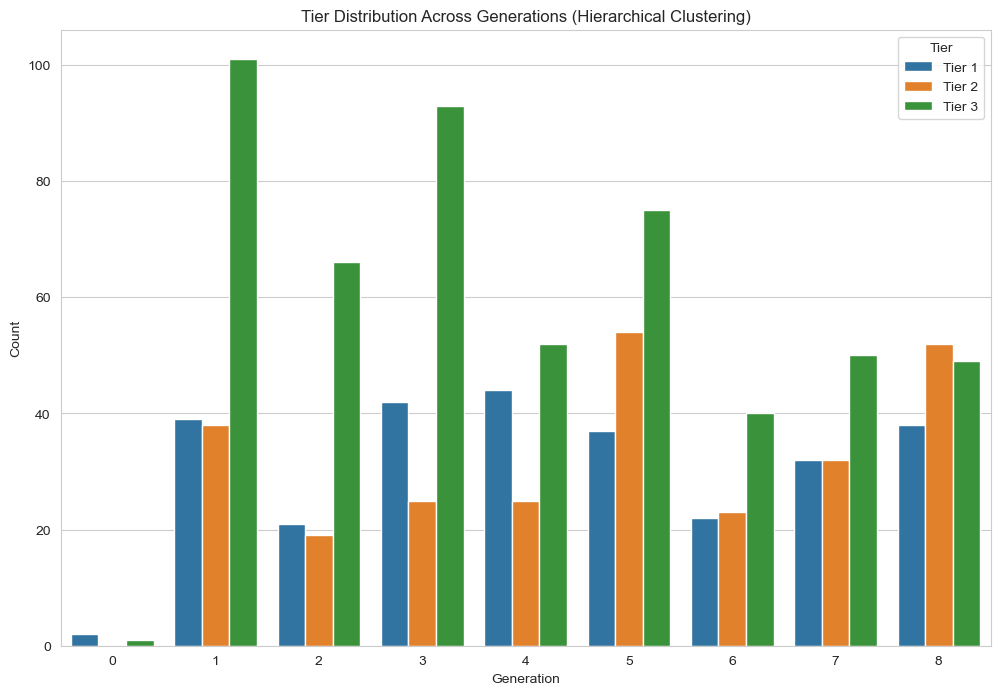

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot to visualize the distribution of tiers across generations
plt.figure(figsize=(12, 8))
sns.countplot(x='generation', hue='tier_hierarchical', data=df, order=sorted(df['generation'].unique()), hue_order=['Tier 1', 'Tier 2', 'Tier 3'])
plt.title('Tier Distribution Across Generations (Hierarchical Clustering)')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.legend(title='Tier', loc='upper right')
plt.show()


<Figure size 1200x800 with 0 Axes>

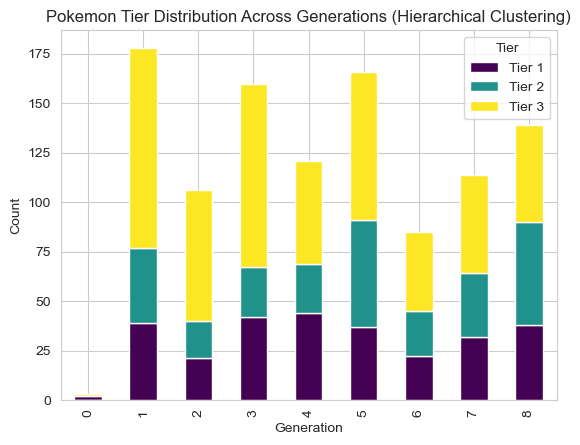

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation of tiers and generations
tier_generation_counts = pd.crosstab(index=df['generation'], columns=df['tier_hierarchical'])

# Plot a stacked bar plot
plt.figure(figsize=(12, 8))
tier_generation_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Pokemon Tier Distribution Across Generations (Hierarchical Clustering)')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.legend(title='Tier', loc='upper right')
plt.show()


<Figure size 1200x800 with 0 Axes>

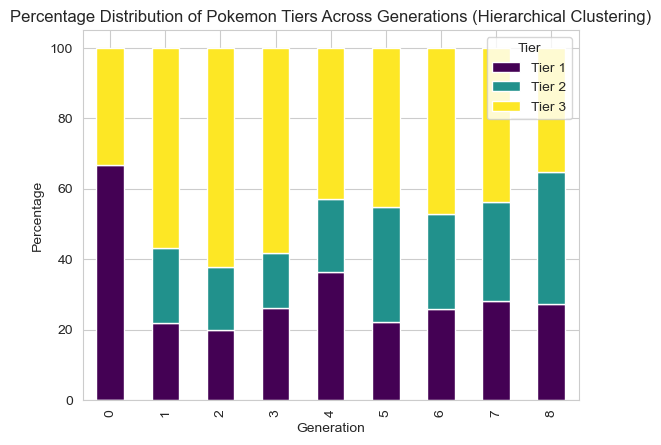

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation of tiers and generations
tier_generation_counts = pd.crosstab(index=df['generation'], columns=df['tier_hierarchical'])

# Calculate the percentage distribution
tier_generation_percentages = tier_generation_counts.div(tier_generation_counts.sum(axis=1), axis=0) * 100

# Plot a stacked bar plot
plt.figure(figsize=(12, 8))
tier_generation_percentages.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Percentage Distribution of Pokemon Tiers Across Generations (Hierarchical Clustering)')
plt.xlabel('Generation')
plt.ylabel('Percentage')
plt.legend(title='Tier', loc='upper right')
plt.show()
